# Hi!

I'm **Rizky Anshari**

Notebook ini adalah bentuk evaluasi saya pada pembelajaran machine learning untuk unpervised learning.

### The Data Query
**SELECT * FROM `ftds-hacktiv8-project.phase1_ftds_001_hck.credit-card-information` 
WHERE  mod (CUST_ID, 2) <> 0;**

### The Objective
Membuat model clustering untuk melakukan Customer Segmentation dari data kartu kredit sebuah bank dibawah ini. Data ini merupakan data informasi penggunaan kartu kredit selama 6 bulan terakhir.

![Image](https://miro.medium.com/max/600/0*h4sVj1vJ2FojtJQS.png)

**Dataset Explained** 
- BALANCE : Jumlah saldo yang tersisa di akun pelanggan untuk melakukan pembelian
- BALANCE_FREQUENCY : Seberapa sering Saldo diperbarui, skor antara 0 dan 1 (1 = sering diperbarui, 0 = tidak sering diperbarui)
- PURCHASES : Jumlah pembelian yang dilakukan dari akun
- ONEOFFPURCHASES : Jumlah pembelian maksimum yang dilakukan dalam sekali jalan
- INSTALLMENTS_PURCHASES : Jumlah pembelian yang dilakukan dengan mencicil
- CASH_ADVANCE : Uang tunai di muka yang diberikan oleh pengguna
- PURCHASES_FREQUENCY : Seberapa sering Pembelian dilakukan, skor antara 0 dan 1 (1 = sering dibeli, 0 = tidak sering dibeli)
- ONEOFF_PURCHASES_FREQUENCY : Seberapa sering Pembelian terjadi dalam sekali jalan (1 = sering dibeli, 0 = tidak sering dibeli)
- PURCHASES_INSTALLMENTS_FREQUENCY : Seberapa sering pembelian dengan mencicil sedang dilakukan (1 = sering dilakukan, 0 = tidak sering dilakukan)
- CASH_ADVANCE_FREQUENCY : Seberapa sering uang tunai di muka dibayarkan
- CASH_ADVANCE_TRX : Jumlah Transaksi yang dilakukan dengan "Cash in Advance"
- PURCHASES_TRX : Jumlah transaksi pembelian yang dilakukan
- CREDIT_LIMIT : Limit Kartu Kredit untuk pengguna
- PAYMENTS : Jumlah Pembayaran yang dilakukan oleh pengguna
- MINIMUM_PAYMENTS : Jumlah minimum pembayaran yang dilakukan oleh pengguna
- PRC_FULL_PAYMENT : Persentase pembayaran penuh yang dibayarkan oleh pengguna
- TENURE : Masa sewa layanan kartu kredit untuk pengguna

# A. Library
*Library - library yang digunakan :*

In [ ]:
!pip install phik

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import phik

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score



# B. Data Loading
*pada data loading akan dilakukan pemuatan data dan mengamatan sederhana*

In [ ]:
# load dataset
data = pd.read_csv('h8dsft_P1G4_rizky_anshari.csv')
data1 = pd.read_csv('h8dsft_P1G4_rizky_anshari.csv')

# mengganti option agar seluruh kolom dapat ditampilkan
pd.set_option('display.max_columns', None)

In [ ]:
# menampilkan 5 baris data pertama
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,3091,3.833185,0.125,45.00,45.00,0.0,0.0,0.125,0.125,0.0,0.0,0,1,500.0,0.000000,NaN,0.0,8
1,5069,0.000000,0.000,176.03,176.03,0.0,0.0,0.125,0.125,0.0,0.0,0,1,7000.0,0.000000,NaN,0.0,8
2,6075,757.964752,0.875,157.40,157.40,0.0,0.0,0.125,0.125,0.0,0.0,0,6,1200.0,1494.480376,2638.598410,0.0,8
3,6291,264.566591,0.375,1150.00,1150.00,0.0,0.0,0.125,0.125,0.0,0.0,0,1,1200.0,3029.380326,85.428885,0.0,8
4,7755,440.613643,1.000,600.00,600.00,0.0,0.0,0.125,0.125,0.0,0.0,0,1,1000.0,215.316424,137.846006,0.0,8


In [ ]:
# menampilkan 5 baris data terakhir
data.tail()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
4470,2345,9629.808851,1.0,0.0,0.0,0.0,4372.393835,0.000000,0.000000,0.0,0.545455,9,0,12000.0,2468.988022,2134.295731,0.0,11
4471,6785,1040.030221,1.0,0.0,0.0,0.0,1390.648290,0.000000,0.000000,0.0,0.545455,18,0,1400.0,290.129620,287.994171,0.0,11
4472,7347,1322.818587,1.0,0.0,0.0,0.0,762.301096,0.000000,0.000000,0.0,0.545455,11,0,1500.0,1035.627320,312.835530,0.0,11
4473,8447,1060.391273,1.0,0.0,0.0,0.0,1475.858013,0.000000,0.000000,0.0,0.545455,10,0,2000.0,407.360560,277.084736,0.0,11
4474,1995,3447.674222,1.0,205.0,205.0,0.0,4548.057776,0.090909,0.090909,0.0,0.545455,7,1,10500.0,665.239171,817.844662,0.0,11


In [ ]:
# menampilkan ukuran dataset
data.shape

(4475, 18)

In [ ]:
# dataset info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4475 entries, 0 to 4474
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           4475 non-null   int64  
 1   BALANCE                           4475 non-null   float64
 2   BALANCE_FREQUENCY                 4475 non-null   float64
 3   PURCHASES                         4475 non-null   float64
 4   ONEOFF_PURCHASES                  4475 non-null   float64
 5   INSTALLMENTS_PURCHASES            4475 non-null   float64
 6   CASH_ADVANCE                      4475 non-null   float64
 7   PURCHASES_FREQUENCY               4475 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        4475 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  4475 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            4475 non-null   float64
 11  CASH_ADVANCE_TRX                  4475 non-null   int64  
 12  PURCHA

pada dataset :
- terdapat 4475 row data dan 18 kolom
- terdiri dari 14 kolom float dan 4 kolom int64
- terdapat missing value pada kolom *MINIMUM_PAYMENTS*

In [ ]:
# describe dataset
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CUST_ID,4475.0,4475.000000,2583.931114,1.000000,2238.000000,4475.000000,6712.000000,8949.00000
BALANCE,4475.0,1563.205717,2072.045789,0.000000,124.432849,871.355430,2047.570799,18495.55855
BALANCE_FREQUENCY,4475.0,0.876933,0.238222,0.000000,0.888889,1.000000,1.000000,1.00000
PURCHASES,4475.0,1003.251343,2060.034730,0.000000,39.560000,360.000000,1102.420000,41050.40000
ONEOFF_PURCHASES,4475.0,596.369893,1653.425984,0.000000,0.000000,45.650000,575.220000,40624.06000
INSTALLMENTS_PURCHASES,4475.0,407.110215,880.799744,0.000000,0.000000,88.620000,455.885000,14686.10000
CASH_ADVANCE,4475.0,984.288554,2060.448056,0.000000,0.000000,0.000000,1138.887754,47137.21176
PURCHASES_FREQUENCY,4475.0,0.490579,0.402907,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,4475.0,0.202301,0.298203,0.000000,0.000000,0.083333,0.250000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,4475.0,0.363886,0.397603,0.000000,0.000000,0.166667,0.750000,1.00000


tidak ditemukan anomali pada keselurahan data. tetapi nilai *MAX berbeda significant dengan Quartil 3* pada beberapa kolom, **indikasi beberapa kolom memiliki distribusi skew**. seperti pada kolom *BALANCE, ONEOFF_PURCHASE, INSTALLMENT_PURCHASE,* dsb.

## Data Cleaning

### Missing Value

In [ ]:
# checking data missing
data.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          0
PAYMENTS                              0
MINIMUM_PAYMENTS                    155
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

data memiliki **155 missing value** pada kolom MINIMUM_PAYMENT.

In [ ]:
# menampilkan 155 data missing value
data[data.MINIMUM_PAYMENTS.isna()]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,3091,3.833185,0.125000,45.00,45.00,0.0,0.000000,0.125,0.125,0.0,0.000000,0,1,500.0,0.000000,NaN,0.0,8
1,5069,0.000000,0.000000,176.03,176.03,0.0,0.000000,0.125,0.125,0.0,0.000000,0,1,7000.0,0.000000,NaN,0.0,8
6,8629,0.228572,0.125000,60.00,60.00,0.0,0.000000,0.125,0.125,0.0,0.000000,0,1,1500.0,438.738982,NaN,0.0,8
21,883,1464.324632,1.000000,1174.39,1174.39,0.0,0.000000,0.250,0.250,0.0,0.000000,0,8,9000.0,0.000000,NaN,0.0,12
25,1173,16.887571,0.363636,1083.00,1083.00,0.0,0.000000,0.250,0.250,0.0,0.000000,0,3,1200.0,3905.430817,NaN,0.0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4271,2693,19.949534,0.111111,0.00,0.00,0.0,326.731167,0.000,0.000,0.0,0.111111,5,0,2500.0,0.000000,NaN,0.0,9
4272,2813,0.000000,0.000000,0.00,0.00,0.0,253.887233,0.000,0.000,0.0,0.111111,1,0,500.0,2437.932505,NaN,0.0,9
4274,3943,8.187263,0.111111,0.00,0.00,0.0,793.848237,0.000,0.000,0.0,0.111111,1,0,1350.0,0.000000,NaN,0.0,9
4276,5999,25.998899,0.111111,0.00,0.00,0.0,466.387778,0.000,0.000,0.0,0.111111,1,0,4000.0,0.000000,NaN,0.0,9


menampilkan data missing value 
- ditemukan banyak kolom berisi nilai 0

In [ ]:
data[data.MINIMUM_PAYMENTS.isna()].describe().T

,count,mean,std,min,25%,50%,75%,max
CUST_ID,155.0,4444.238710,2454.737559,67.0,2597.000000,4411.000000,6584.000000,8935.000000
BALANCE,155.0,472.655725,1299.988321,0.0,0.000000,12.281874,188.694363,9164.724752
BALANCE_FREQUENCY,155.0,0.378007,0.409665,0.0,0.000000,0.181818,1.000000,1.000000
PURCHASES,155.0,380.552581,600.804654,0.0,19.010000,130.400000,443.250000,3407.690000
ONEOFF_PURCHASES,155.0,243.559097,511.588213,0.0,0.000000,0.000000,156.055000,2483.260000
INSTALLMENTS_PURCHASES,155.0,136.993484,282.129396,0.0,0.000000,0.000000,154.415000,1990.810000
CASH_ADVANCE,155.0,508.386970,1172.157964,0.0,0.000000,0.000000,412.694209,7616.064965
PURCHASES_FREQUENCY,155.0,0.330450,0.366232,0.0,0.083333,0.166667,0.541667,1.000000
ONEOFF_PURCHASES_FREQUENCY,155.0,0.088915,0.176113,0.0,0.000000,0.000000,0.083333,1.000000
PURCHASES_INSTALLMENTS_FREQUENCY,155.0,0.253783,0.370578,0.0,0.000000,0.000000,0.477272,1.000000


setelah di lihat lebih dekat data dengan nilai missing ini 
- ternyata adalah nasabah yang jarang melakukan transaksi
- banyak nilai - nilai 0 pada tiap kolom
- dan dapat dilihat pada PAYMENT nasabah ini hanya memiliki mean/rata2 $539 dolar pembayaran
- itupun dengan nilai Quantile 1,2 yang mayoritas 0 atau nilai mean ini sebenarnya bukan representasi keselurahan nasabah ini juga.

*dengan pertimbangan ini data kita pertahankan, karena data ini mewakili nasabah pada segmentasi sedikit belanja.*
treatment missing akan dimasukan nilai quantile 25%, agar merepresentasikan kalau ini adalah nasabah yang jarang belanja

In [ ]:
# memasukan nilai quantile 25% pada nilai missing value
data.MINIMUM_PAYMENTS.fillna(data.MINIMUM_PAYMENTS.quantile(0.25), inplace=True)

In [ ]:
# sample data missing yang telah masukan nilai quantile 25%
data.loc[6:6, ['MINIMUM_PAYMENTS']]

,MINIMUM_PAYMENTS
6,168.590144


In [ ]:
# checking data duplicated
data.duplicated().sum()

0

tidak ditemukan data duplicated

In [ ]:
# melihat jumah unique kolom cust_id
data.CUST_ID.nunique()

4475

sesuai dugaan kolom unique value nya sejumlah kolom, yang artinya tidak memiliki korelasi sama sekali terhadap data.

karena menggunakan pca saya ingin mencoba untuk mengabaikan dan tetap menggunakan kolom ini

# C. E D A
*exploring data*

interval columns not set, guessing: ['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']


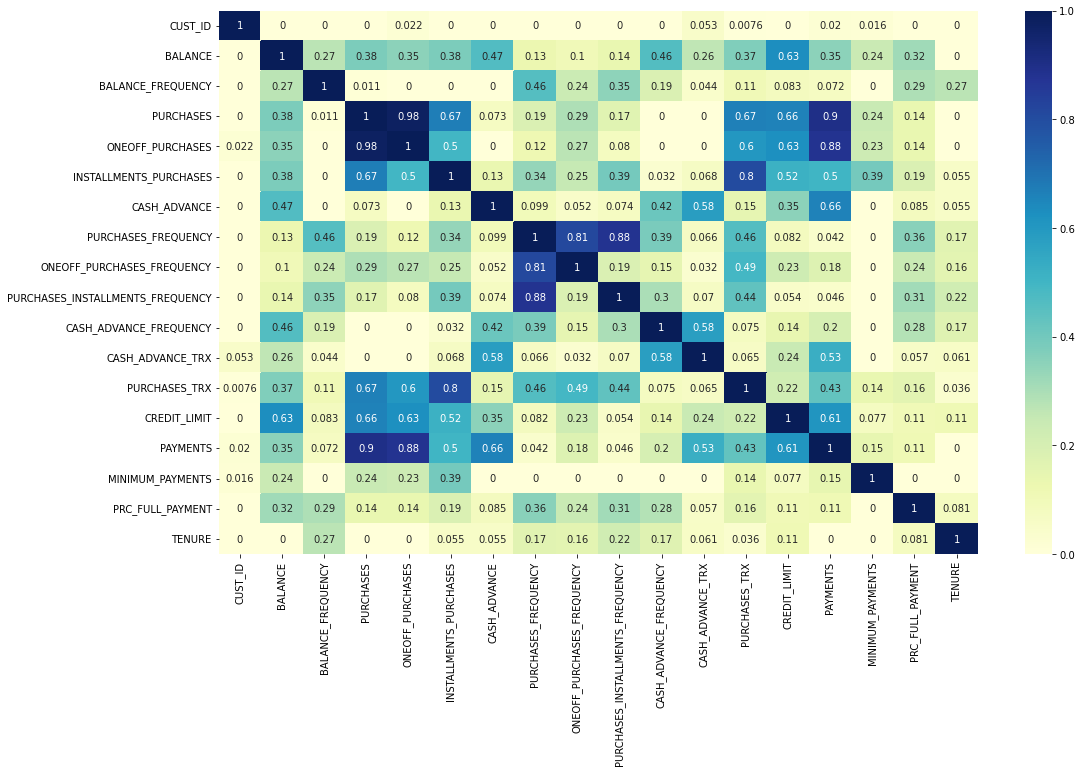

In [ ]:
# plot nilai korelasi antar kolom data
plt.figure(figsize=(17,10))
sns.heatmap(data.phik_matrix(),
            vmin=0,
            vmax=1,
            annot=True,
            cmap='YlGnBu')

heatmap menggabarkan korelasi antar feature, penulis ingin mengetahui feature apakah yang berpengaruh terhadap hasil clustering

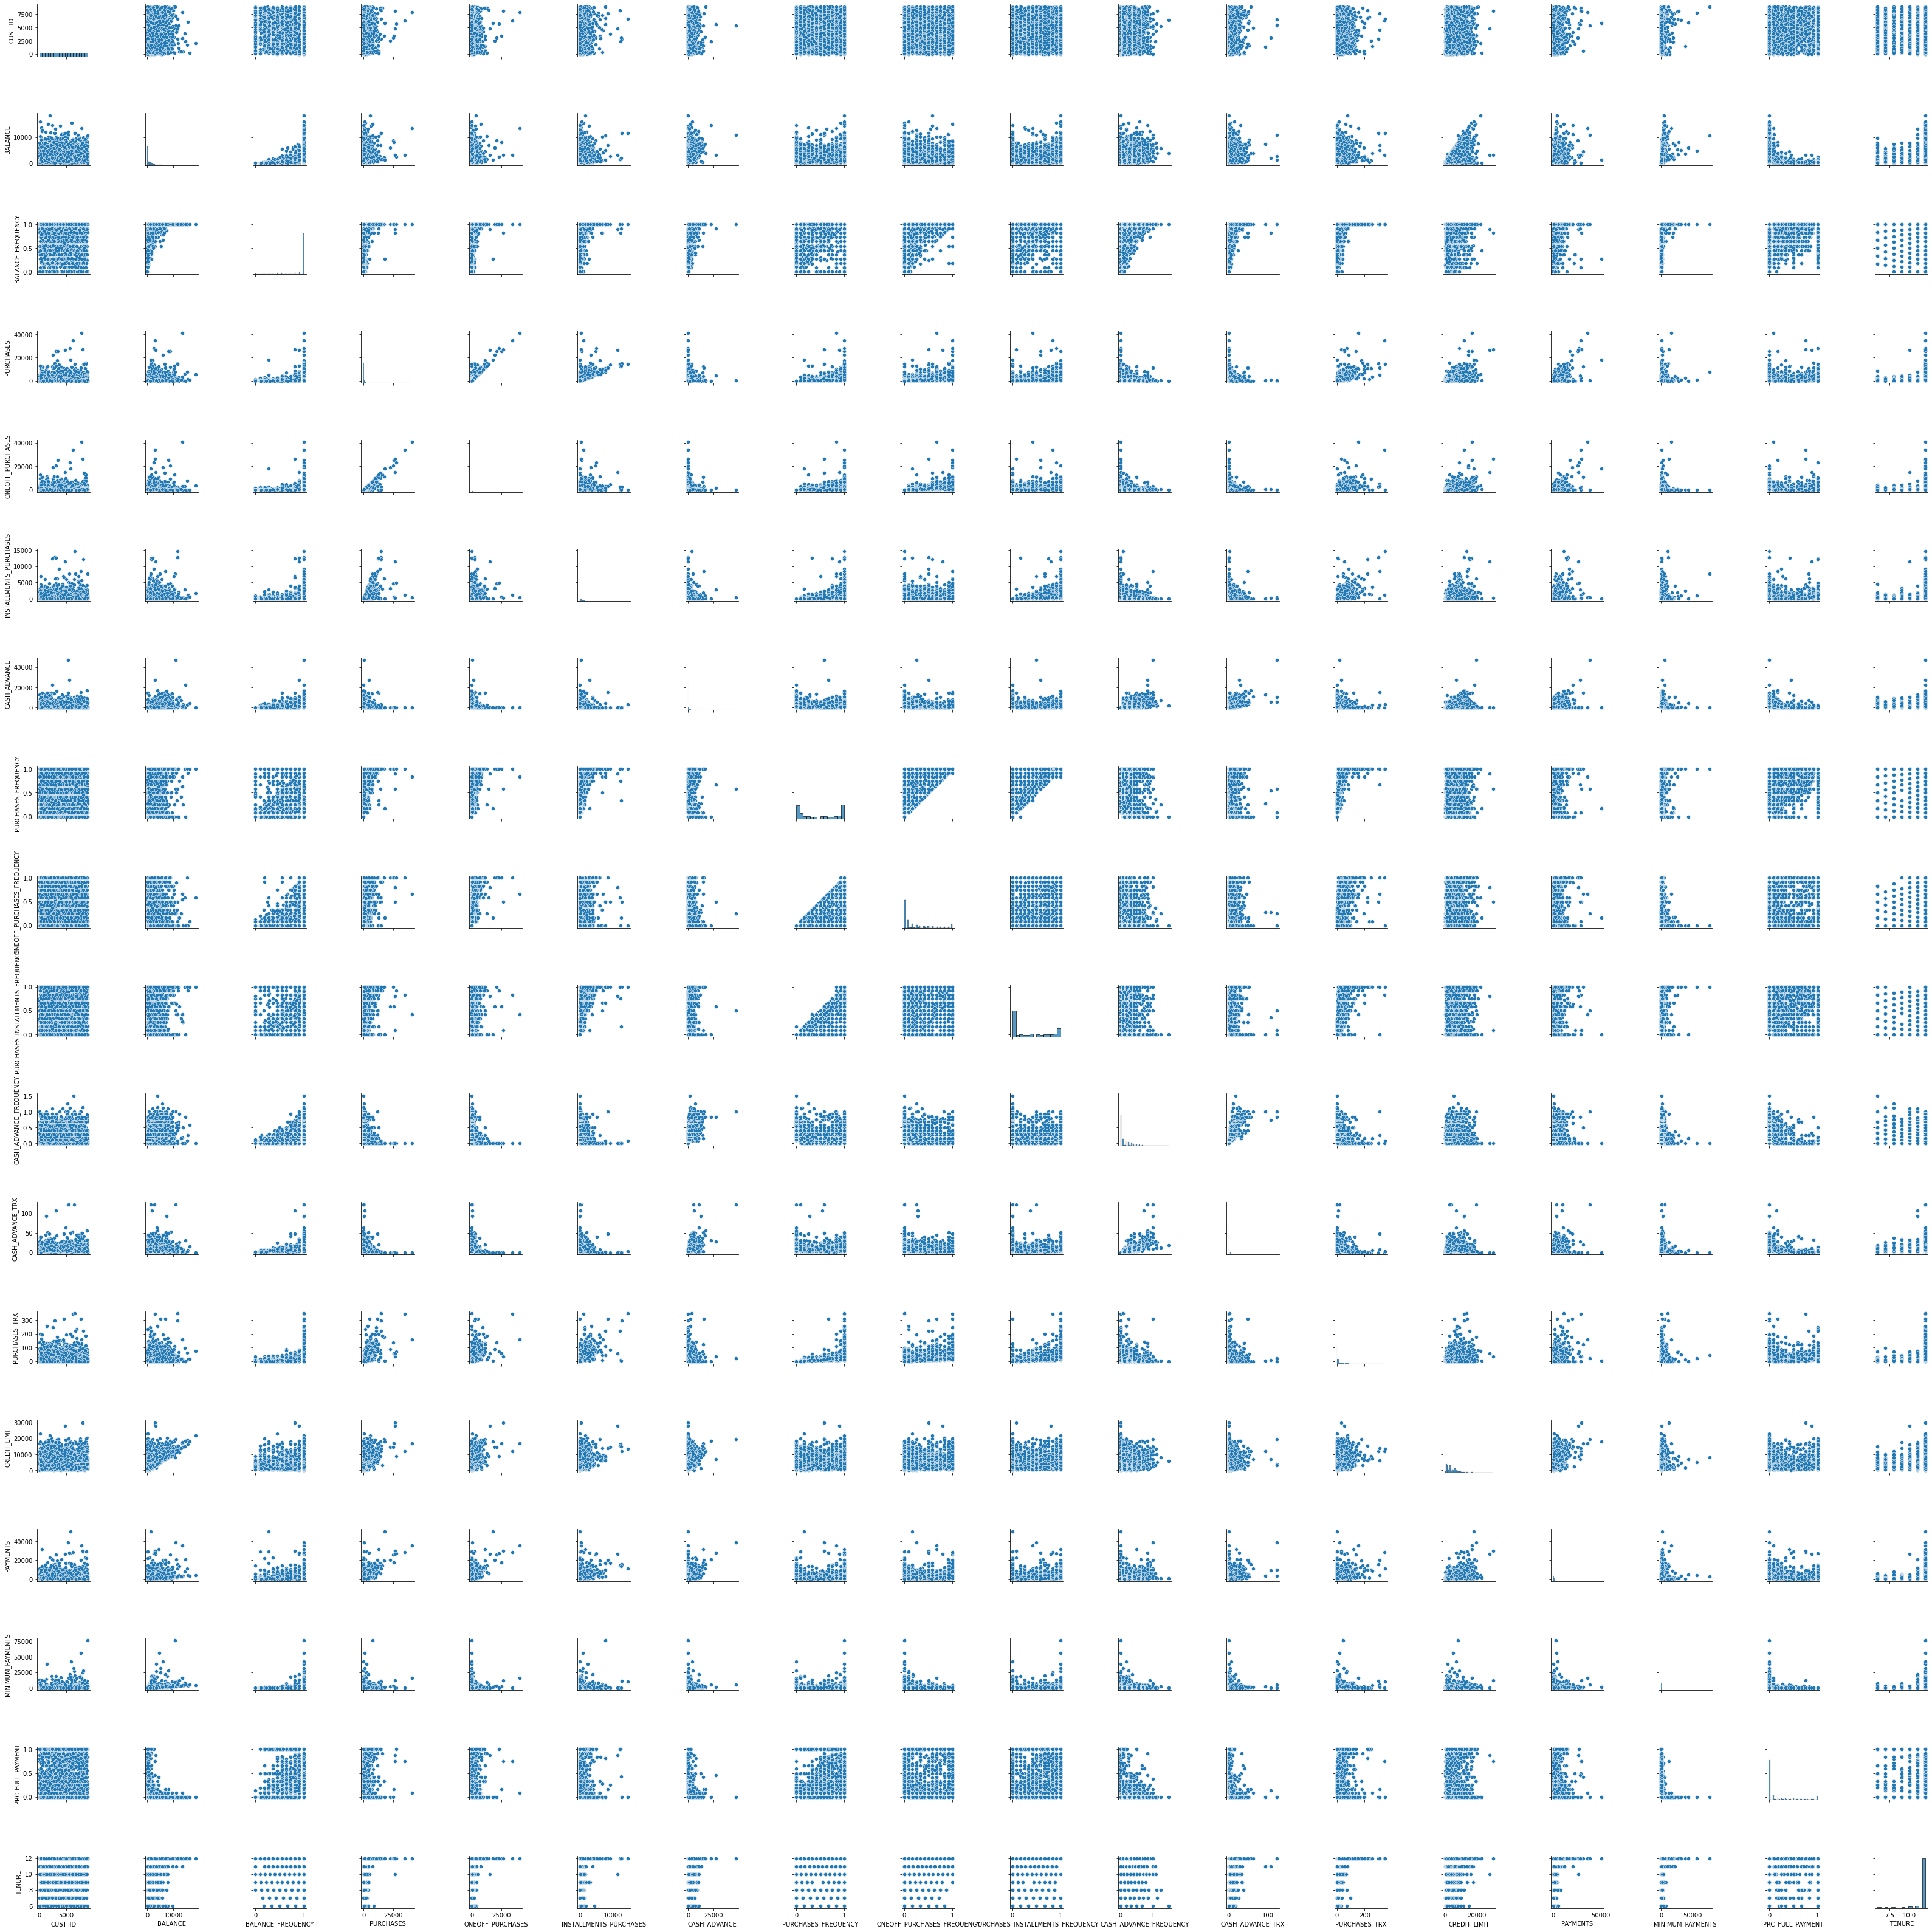

In [ ]:
# Pairplot chec distribusi data
sns.pairplot(data)

pada tampilan data distribusi kebanyakan datanya berdistribusi skew dan ada korelasi pada kolom lainnya.

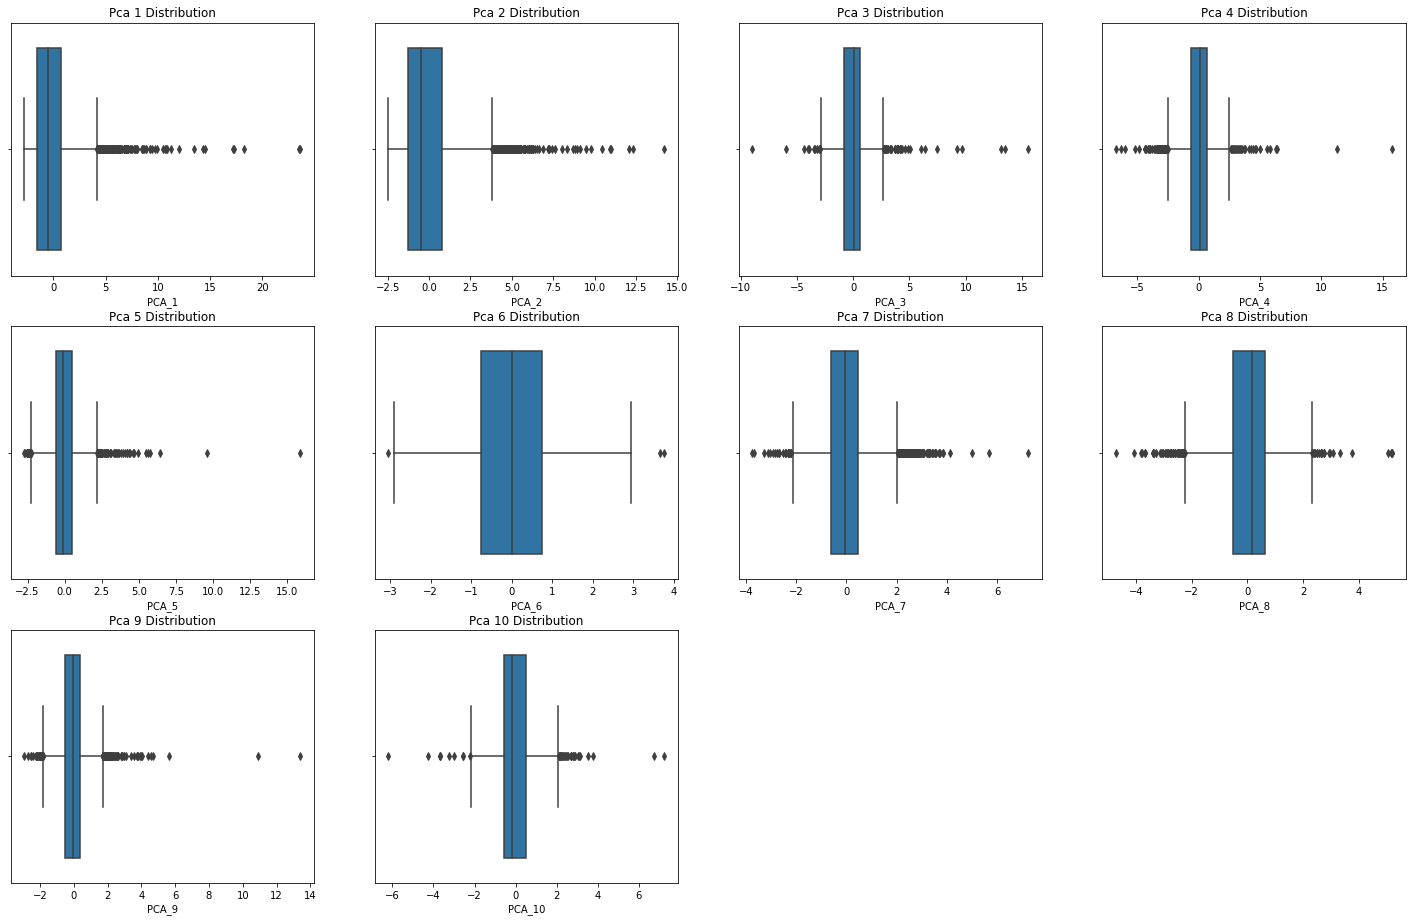

In [ ]:
plt.figure(figsize=(25, 27))
for col in data.columns:
    plt.subplot(5, 4, data.columns.get_loc(col) + 1)
    sns.boxplot(x=col, data=train)
    plt.title(f"{col.replace('_', ' ').title()} Distribution")
plt.show()

hampir semua kolom memiliki outlier pada datanya, apakah outlier ini akan di handling akan dilakukan pengamatan lebih lanjut pada step setelah ini.

# D. Data Preprocessing
*bagian ini berisi penyiapan data untuk modelling*

### Split Data : Trainig, Test

In [ ]:
# train_test_split
# memisahkan data train dan test
train, test = train_test_split(data, test_size=0.3, random_state=21)

print('Train size: ', train.shape)
print('Test size: ', test.shape)

Train size:  (3132, 18)
Test size:  (1343, 18)


In [ ]:
train1 = train.copy
test1 = test.copy

### Outlier Handling

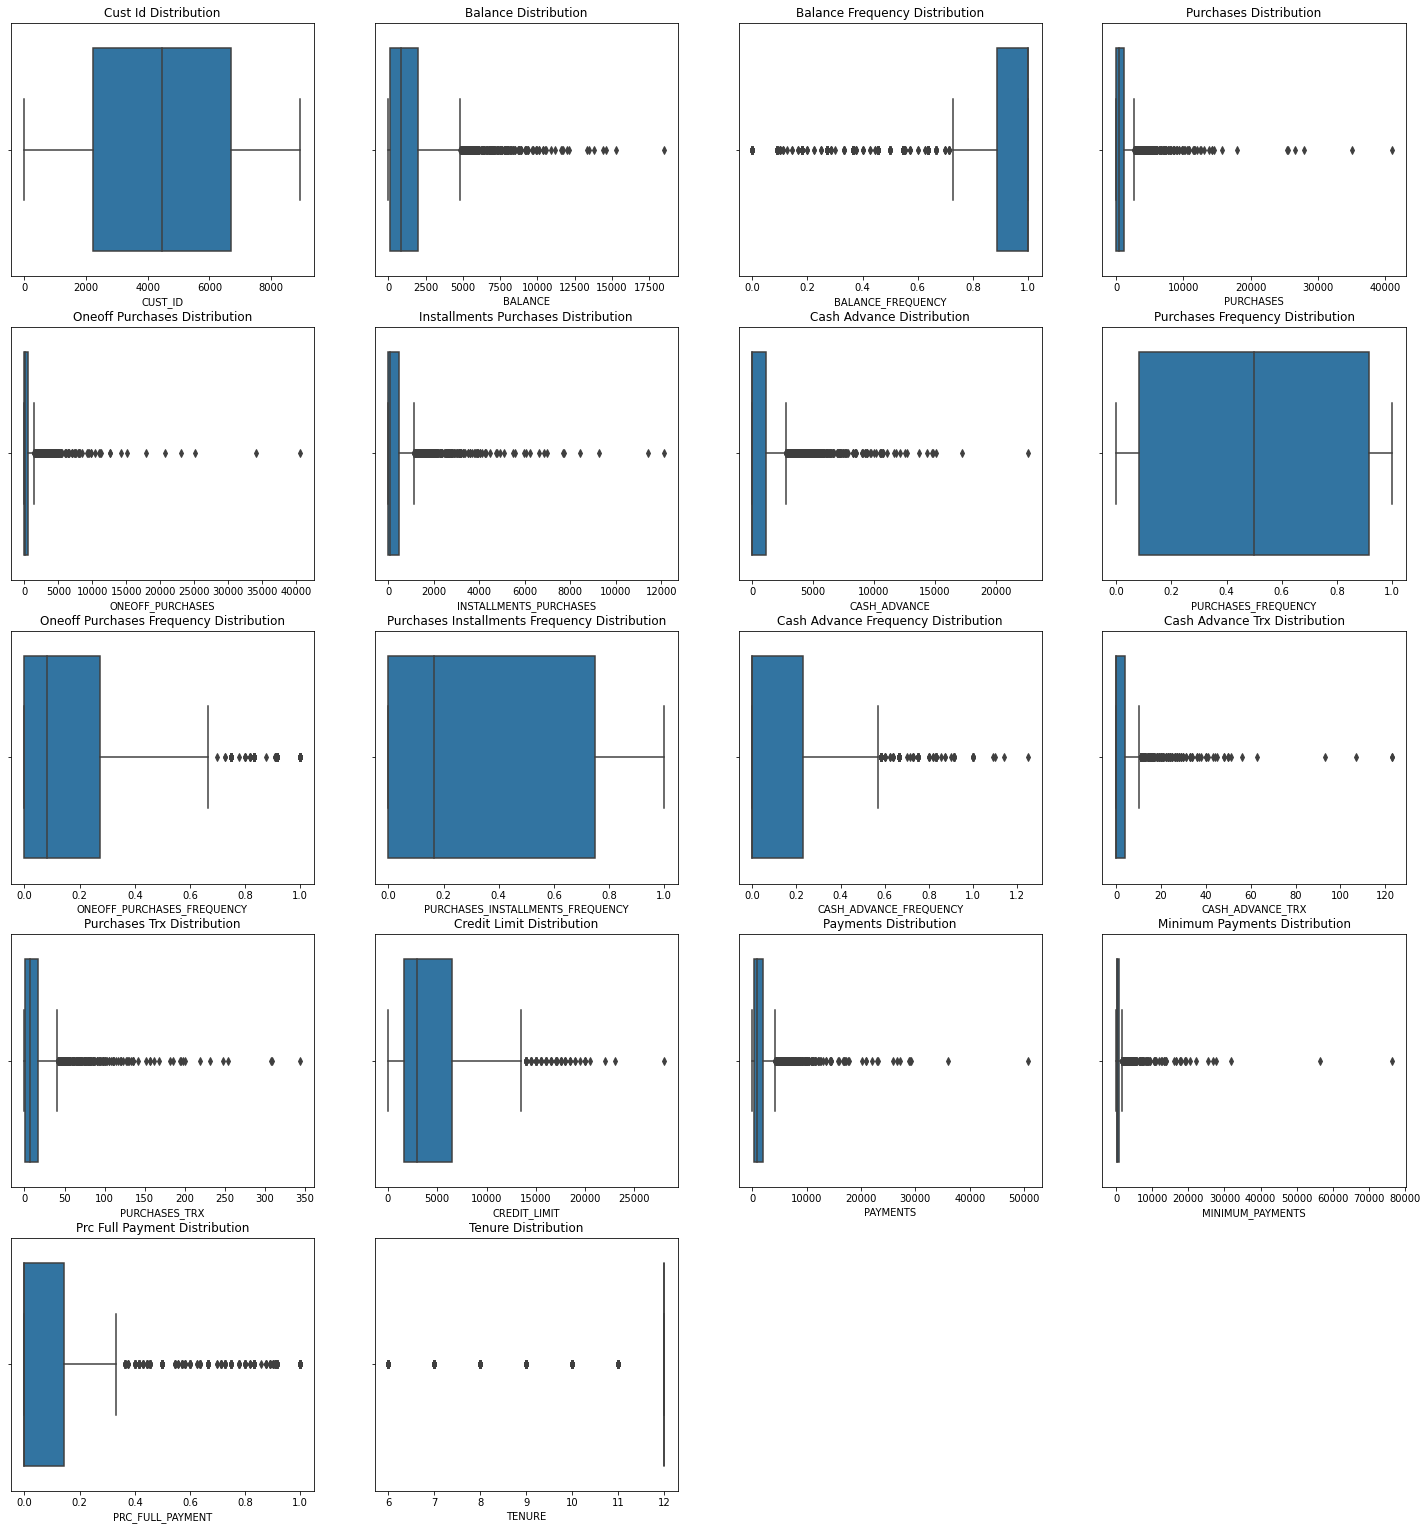

In [ ]:
plt.figure(figsize=(25, 27))
for col in train.columns:
    plt.subplot(5, 4, data.columns.get_loc(col) + 1)
    sns.boxplot(x=col, data=train)
    plt.title(f"{col.replace('_', ' ').title()} Distribution")
plt.show()

In [ ]:
def upper_lower(df, col):
    IQR = df[col].quantile(0.75) - df[col].quantile(0.25)
    upper_bound = df[col].quantile(0.75) + 1.5 * IQR
    lower_bound = df[col].quantile(0.25) - 1.5 * IQR
    return df[(df[col] > lower_bound) & (df[col] < upper_bound)]

In [ ]:
cols = ['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT']
outlier_precentage = pd.DataFrame(columns=['Column', 'Outlier Precentage'])
for i in range(len(cols)):
    outlier_precentage.loc[i] = [cols[i], round(upper_lower(train, cols[i]).shape[0] / train.shape[0] * 100, 2)]
outlier_precentage

,Column,Outlier Precentage
0,BALANCE,91.51
1,PURCHASES,90.36
2,ONEOFF_PURCHASES,88.25
3,INSTALLMENTS_PURCHASES,90.13
4,CASH_ADVANCE,88.41
5,CASH_ADVANCE_TRX,89.62
6,PURCHASES_TRX,90.93
7,CREDIT_LIMIT,97.19
8,PAYMENTS,90.74
9,MINIMUM_PAYMENTS,89.21


setelah di tinjau jumlah outlier ternyata ada pada 11 kolom
- dengan nilai outlier yang sangat besar
- outlier ini tidak mungkin di drop karena jumlahnya bahkan mencapat 97% dari data
- meteode yang dapat digunakan adalah capping
- tetapi untuk pengamatan awal penulis ingin melihat data ini secara nyata untuk model clusterkan. dengan asumsi kebergaman data dan nilai real datanya.

### Scalling Data

In [ ]:
# scaling data
scaler = StandardScaler()

train = scaler.fit_transform(train)
test = scaler.transform(test)

In [ ]:
# memasukan nilai scaler pada dataframe
train = pd.DataFrame(train, columns=data.columns)
test = pd.DataFrame(test, columns=data.columns)

In [ ]:
train.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0.231031,-0.142192,0.517876,0.851724,0.094307,2.013998,-0.507637,1.258492,1.254543,1.602077,-0.672657,-0.449866,2.547177,-0.008368,-0.099552,-0.234382,-0.523861,0.364534
1,-1.577974,-0.711290,0.517876,-0.182038,-0.231143,0.020679,-0.507637,0.844228,0.702545,0.761978,-0.672657,-0.449866,0.276821,-0.421203,-0.357409,-0.277170,-0.523861,0.364534
2,-0.391007,-0.224928,0.517876,-0.476927,-0.351750,-0.488494,0.325265,-1.227090,-0.677455,-0.918222,0.162092,-0.172781,-0.584349,-0.834038,0.480118,-0.224604,0.048413,0.364534
3,-0.492880,1.364166,0.517876,-0.145805,0.050787,-0.488494,-0.507637,1.258492,2.634543,-0.918222,-0.672657,-0.449866,-0.114620,-0.008368,-0.129627,0.199001,-0.523861,0.364534
4,-0.591665,-0.524981,0.517876,0.165791,-0.314549,1.104279,-0.355866,0.015701,-0.401457,0.131903,0.162092,-0.172781,-0.310341,-0.696427,0.039214,-0.238284,0.162867,0.364534


data setelah discalling untuk menyamakan range pada data ini,
disini terdapat kolom cust_id juga yang di scalling, kolom ini dimasukan karena penulis ingin mengetahui pengaruh nilai unique yang tinggi pada pca dan model.

## PCA

In [ ]:
# pca train 18 components
pca = PCA(n_components=18)
pca.fit(train)

PCA(n_components=18)

In [ ]:
# explained variance rasio masih dalam array
cumsum = np.cumsum(pca.explained_variance_ratio_)
cumsum

array([0.25664457, 0.44667883, 0.53299543, 0.60276838, 0.66188527,
       0.71740494, 0.77166918, 0.81715228, 0.85781535, 0.89370639,
       0.92101703, 0.94305353, 0.96086402, 0.97479437, 0.98721675,
       0.99746505, 0.99999908, 1.        ])

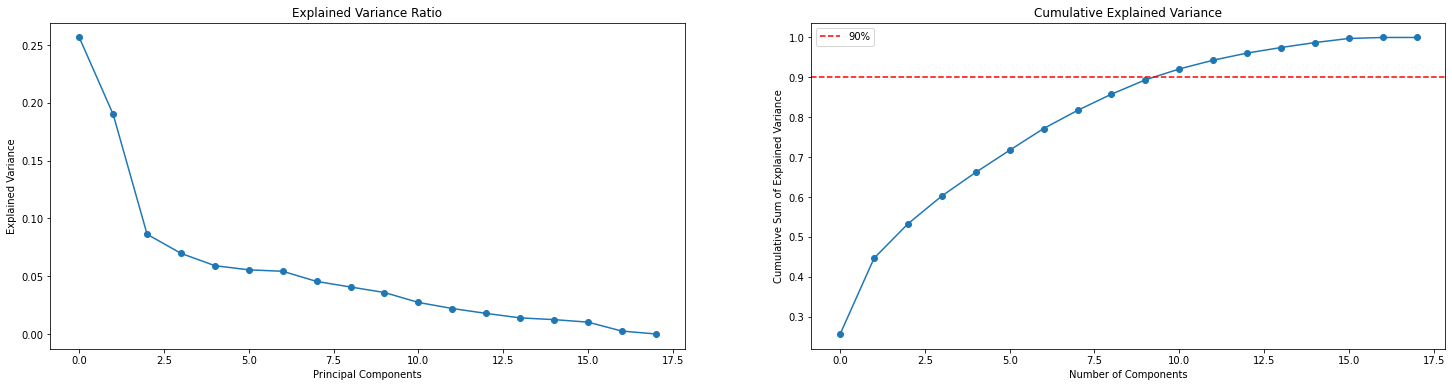

In [ ]:
# plot nilai variance ratio
plt.figure(figsize=(25, 6))
plt.subplot(1, 2, 1)
plt.plot(pca.explained_variance_ratio_, marker='o')
plt.title('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance')
plt.subplot(1, 2, 2)
cev = plt.plot(cumsum, marker='o')
plt.axhline(y=0.9, color='red', linestyle='--', label='90%')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Sum of Explained Variance')
plt.legend()
plt.show()

In [ ]:
print(f'Number of components: {np.argmax(cumsum >= 0.9)}')
print(f'Explained variance: {cumsum[np.argmax(cumsum >= 0.9)]}')

Number of components: 10
Explained variance: 0.9210170348023062


saya ingin mempertahankan informasi sebanyak mungkin dengan persentase 90%, **didapatkan nilai components adalah 10 dengan persentase informasinya 92%.**

In [ ]:
# memasukan nilao pca optimum
pca_10c = PCA(n_components=10)

In [ ]:
train = pca_10c.fit_transform(train)
test = pca_10c.transform(test)

# Convert to dataframe
train = pd.DataFrame(train, columns=['PCA_' + str(i) for i in range(1, 11)])
test = pd.DataFrame(test, columns=['PCA_' + str(i) for i in range(1, 11)])

In [ ]:
train.head()

,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,PCA_6,PCA_7,PCA_8,PCA_9,PCA_10
0,3.350105,-1.133626,-1.392396,0.273895,-0.217635,0.214050,0.208023,0.901541,-1.127138,0.385279
1,0.511497,-1.353023,-0.730562,0.092970,-1.299463,-1.131306,0.680742,0.534841,-0.142732,0.332312
2,-1.573693,0.335183,0.609402,0.161773,-0.286425,-0.198579,-0.014438,0.624824,0.760376,-0.927261
3,0.917009,-0.034420,0.210951,1.154779,-2.140296,0.031781,0.657117,-1.101440,-0.158752,1.420904
4,0.051697,-0.582506,-0.504622,-0.138217,-0.020297,-0.482326,0.082226,0.908703,0.422652,-0.823334


hasil pca telah mereduce dari total 18 kolom, kini tersisa 10 kolom dengan informasi dipertahankan sebesar 92%.

# Modelling

#### **1. K-Means**

**Elbow Method**

In [ ]:
# mencari nilai k optimum
K = [2, 3, 4, 5, 6, 7, 8, 9, 10]
inertia = [KMeans(n_clusters=k, random_state=21).fit(train).inertia_ for k in K]

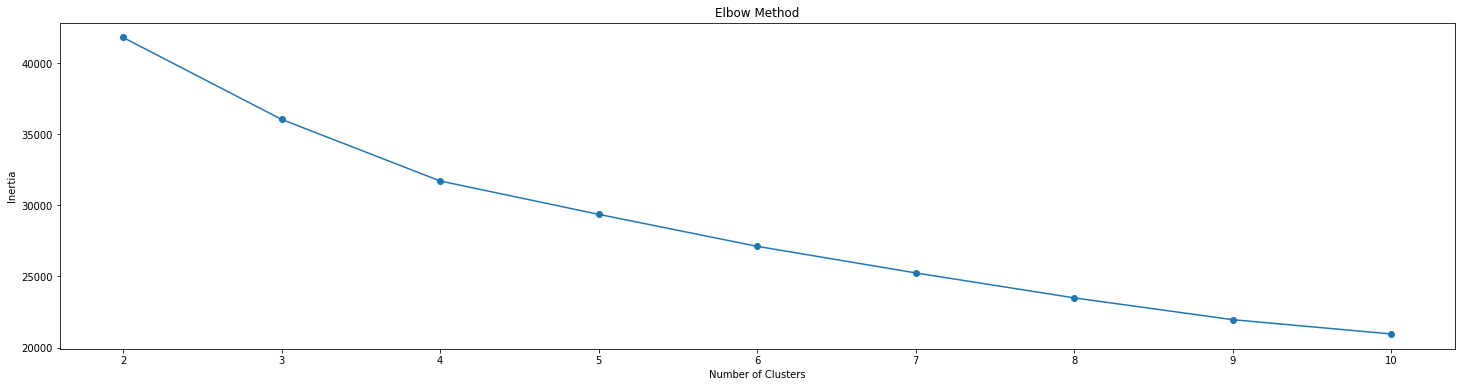

In [ ]:
# plot nilai k 
plt.figure(figsize=(25, 6))
plt.plot(K, inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

- pada grafik ini kurang terlihat untuk elbow optimum nya, karena siku yang terbentuk kurang tajam
- hipotesa awal nilai k 3 / 4
- akan di tambahkan sillhoutte score untuk pengamatan yang lebih baik

**Shilloutte Score**

In [ ]:
# mencari nilai k optimum
kmeans_score = pd.DataFrame(columns=['K', 'Silhouette Score'])

In [ ]:
for i in range(2, 11):
    kmeans_score.loc[i-2] = [i, round(silhouette_score(train, KMeans(n_clusters=i, random_state=21).fit(train).labels_), 3)]

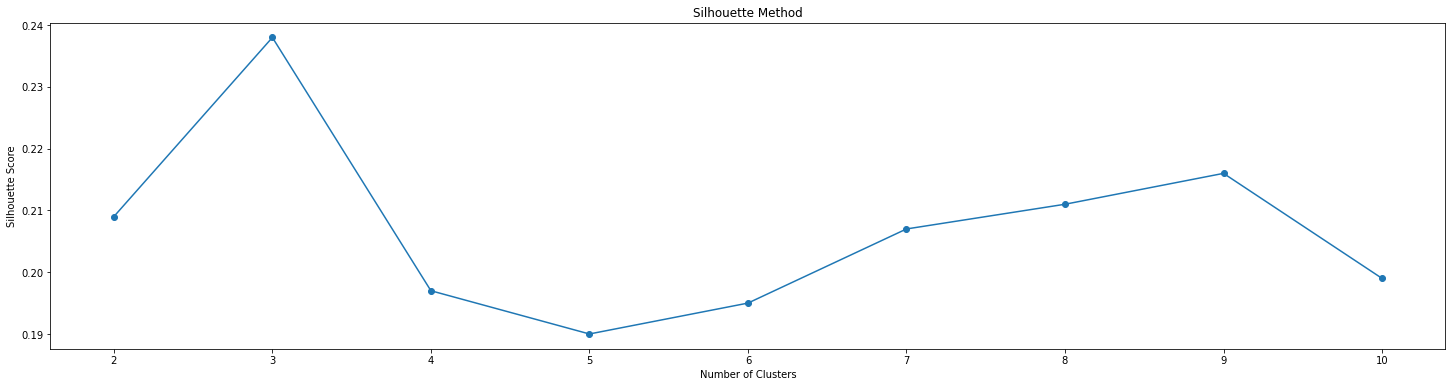

In [ ]:
plt.figure(figsize=(25, 6))
plt.plot(kmeans_score['K'], kmeans_score['Silhouette Score'], marker='o')
plt.title('Silhouette Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [ ]:
kmeans_score.sort_values(by='Silhouette Score', ascending=False)

,K,Silhouette Score
1,3.0,0.238
7,9.0,0.216
6,8.0,0.211
0,2.0,0.209
5,7.0,0.207
8,10.0,0.199
2,4.0,0.197
4,6.0,0.195
3,5.0,0.190


nilai k optimum tergambar jelas pada shillouette score
- pada grafik terlihat nilai yang paling tinggi ada pada k 3
- setelah nilai nya di masukan ke dataframe memang benar confirm jika 3 adalah nilai k terbaik.

**Kmeans n_cluster Terbaik**

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=21)
kmeans.fit(train)

KMeans(n_clusters=3, random_state=21)

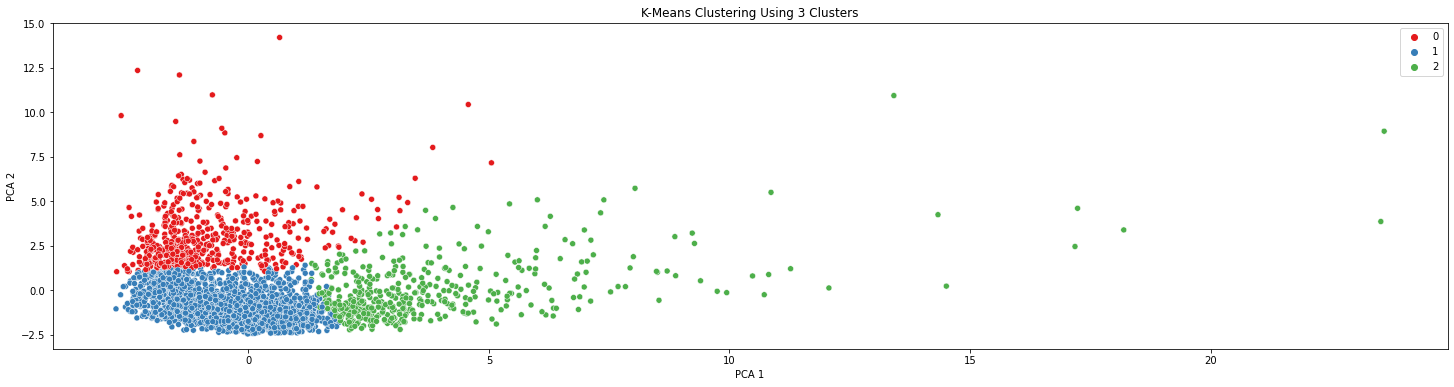

In [ ]:
plt.figure(figsize=(25, 6))
sns.scatterplot(x='PCA_1', y='PCA_2', hue=kmeans.labels_, data=train, palette='Set1')
plt.title('K-Means Clustering Using 3 Clusters')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

didapatkan 3 cluster yang membagi data

### **2. DBSCAN**

In [ ]:
# membuat fungsi
dbscan_score = pd.DataFrame(columns=['eps', 'Silhouette Score'])
epsilons = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

In [ ]:
# mencari nilai silhoette terbaik
for i in range(len(epsilons)):
    dbscan_score.loc[i] = [epsilons[i], round(silhouette_score(train, DBSCAN(eps=epsilons[i]).fit(train).labels_), 3)]

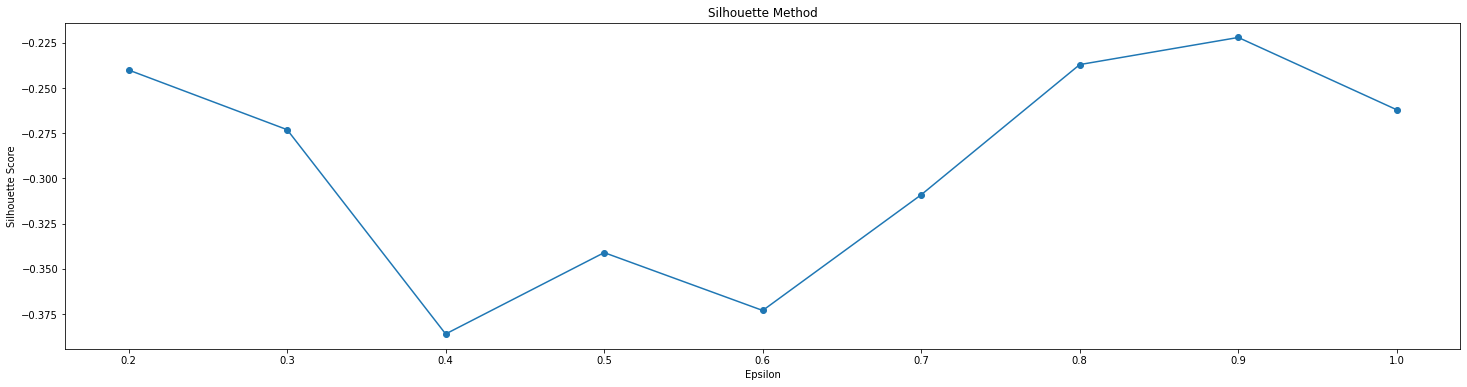

In [ ]:
# menampilkan plot
plt.figure(figsize=(25, 6))
plt.plot(dbscan_score['eps'], dbscan_score['Silhouette Score'], marker='o')
plt.title('Silhouette Method')
plt.xlabel('Epsilon')
plt.ylabel('Silhouette Score')
plt.show()

In [ ]:
# menampilkan nilai epsilon terbaik
dbscan_score.sort_values(by='Silhouette Score', ascending=False)

,eps,Silhouette Score
7,0.9,-0.222
6,0.8,-0.237
0,0.2,-0.240
8,1.0,-0.262
1,0.3,-0.273
5,0.7,-0.309
3,0.5,-0.341
4,0.6,-0.373
2,0.4,-0.386


- didapatkan nilai epsilon terbaik adalah 1

**DBSCAN Epsilon Terbaik**

In [ ]:
dbscan = DBSCAN(eps=1.0)
dbscan.fit(train)

DBSCAN(eps=1.0)

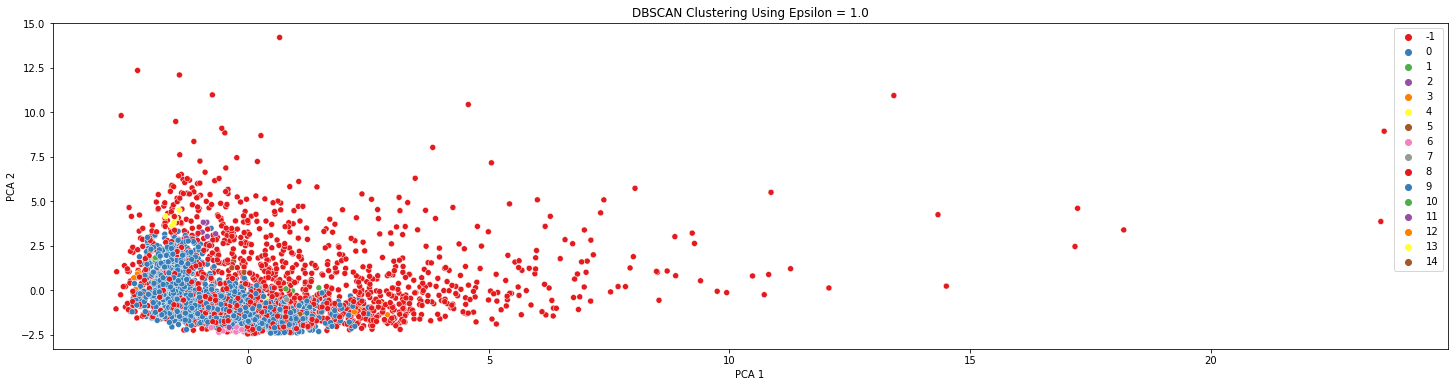

In [ ]:
plt.figure(figsize=(25, 6))
sns.scatterplot(x='PCA_1', y='PCA_2', hue=dbscan.labels_, data=train, palette='Set1')
plt.title('DBSCAN Clustering Using Epsilon = 1.0')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

banyak sekali cluster yang dibuat oleh dbscan ada 10 cluster
- karena memang prinsip dbscan itu sendiri yang tidak cocok dengan distribusi data ini, **dimana prinsip adalah seperti virus yang menjangkit sekitarnya.**
- ditambah disini banyak sekali data outlier sebelum pengolahan datanya

### **3. Agglomerative Clustering**

**shilloutte score dan n cluster**

In [ ]:
# am mencari nilai silloette terbaik anatara 2-11
agglomerative_score = pd.DataFrame(columns=['n_clusters', 'Silhouette Score'])
for i in range(2, 11):
    agglomerative_score.loc[i-2] = [i, round(silhouette_score(train, AgglomerativeClustering(n_clusters=i, linkage='ward').fit(train).labels_), 3)]

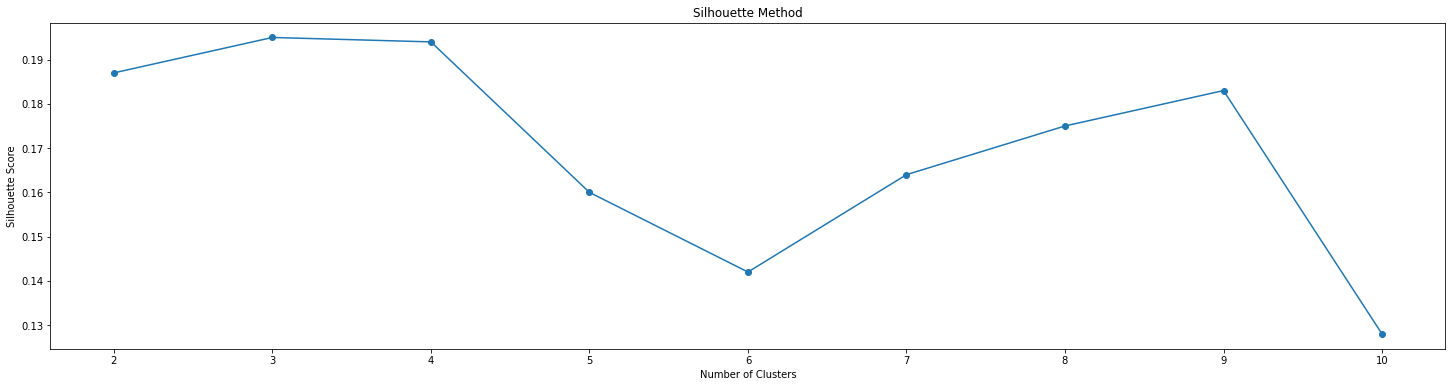

In [ ]:
# plot nilai cluster dan shilloutte score
plt.figure(figsize=(25, 6))
plt.plot(agglomerative_score['n_clusters'], agglomerative_score['Silhouette Score'], marker='o')
plt.title('Silhouette Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [ ]:
# menampilkan nilai cluster dan shillouette scorenya
agglomerative_score.sort_values(by='Silhouette Score', ascending=False)

,n_clusters,Silhouette Score
1,3.0,0.195
2,4.0,0.194
0,2.0,0.187
7,9.0,0.183
6,8.0,0.175
5,7.0,0.164
3,5.0,0.160
4,6.0,0.142
8,10.0,0.128


pada model aglomerative didapatkan nilai cluster optimumnya adalah 2.

**Aglomerative n_cluster Terbaik**

In [ ]:
# modelling aglomerative cluster terbaik
agglomerative = AgglomerativeClustering(n_clusters=2, linkage='ward')
agglomerative.fit(train)

AgglomerativeClustering()

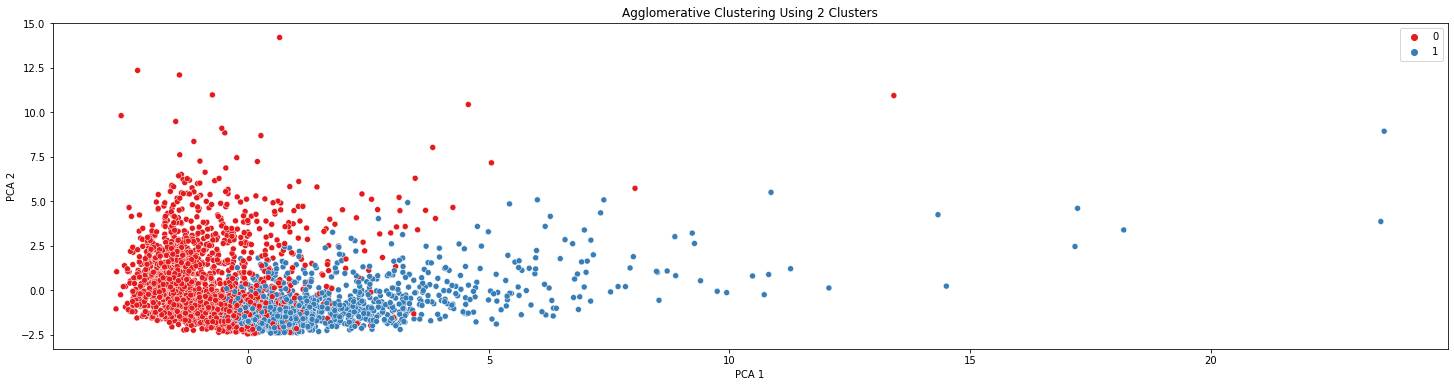

In [ ]:
# plot cluster
plt.figure(figsize=(25, 6))
sns.scatterplot(x='PCA_1', y='PCA_2', hue=agglomerative.labels_, data=train, palette='Set1')
plt.title('Agglomerative Clustering Using 2 Clusters')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

- pada model aglomerative didapatkan 2 cluster yang mewakili data.
- pada hyperparameter ward adalah yang terbaik, karena untuk complete dan average hampir semua data di categorikan merah.
- prinsip kerjanya ada mebagi data pada pohon hirarki seperti dendogram

secara umum dari ketiga model clustering yaitu Kmeans, DBScan, dan Aglomerative yang cukup mewakili pembagian datanya, menurut penulis adalah model Kmeans dengan jumlah cluster 3

secara konsep penulis berharap dbscan dapat memilah data yang tersebar sebagai cluster cluster kecil tetapi ternyata data yang tersebar justru ada didalam 1 cluster dan pada data yang persebarannya padat malah terdapat banyak cluster.

# Model di test

In [ ]:
# dataset test
test.head()

,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,PCA_6,PCA_7,PCA_8,PCA_9,PCA_10
0,0.251771,-1.224392,-0.242431,0.716776,-0.501779,1.591399,-0.108144,0.437923,-0.246519,0.162202
1,-1.928834,2.994508,0.044909,-0.956117,-0.043066,0.501901,-0.468915,1.367730,0.567848,-0.038593
2,1.465811,-1.914323,-1.338832,-0.910288,0.597956,0.083260,-1.948851,-0.946839,0.796435,-1.045697
3,-2.076479,0.064153,0.777935,-0.230919,0.526455,0.743618,-0.684537,0.768322,0.273925,0.340378
4,0.347751,0.342153,0.279173,1.167184,-0.667872,-0.039651,0.388940,-1.544764,-0.797190,-0.004374


In [ ]:
# pedict data test
pred = kmeans.predict(test)

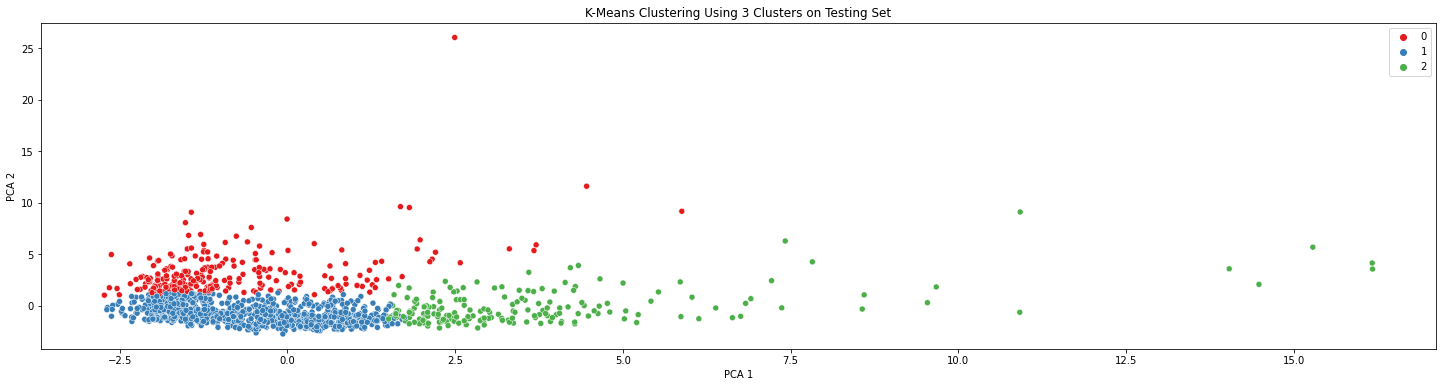

In [ ]:
plt.figure(figsize=(25, 6))
sns.scatterplot(x='PCA_1', y='PCA_2', hue=pred, data=test, palette='Set1')
plt.title('K-Means Clustering Using 3 Clusters on Testing Set')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

hasil clustering pada data test secara umum sama dengan trainnya, dimana persebaran data juga hampir serupa pada data test ini

## **EDA Data Hasil Clustering**

In [ ]:
# memuat data secara utuh
data = pd.concat([train, test])
data_pred = kmeans.predict(data)

In [ ]:
# mengabungkan data dengan cluster
cluster_cc = data1.copy()
cluster_cc['CLUSTER'] = data_pred
cluster_cc.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CLUSTER
0,3091,3.833185,0.125,45.00,45.00,0.0,0.0,0.125,0.125,0.0,0.0,0,1,500.0,0.000000,NaN,0.0,8,2
1,5069,0.000000,0.000,176.03,176.03,0.0,0.0,0.125,0.125,0.0,0.0,0,1,7000.0,0.000000,NaN,0.0,8,1
2,6075,757.964752,0.875,157.40,157.40,0.0,0.0,0.125,0.125,0.0,0.0,0,6,1200.0,1494.480376,2638.598410,0.0,8,1
3,6291,264.566591,0.375,1150.00,1150.00,0.0,0.0,0.125,0.125,0.0,0.0,0,1,1200.0,3029.380326,85.428885,0.0,8,1
4,7755,440.613643,1.000,600.00,600.00,0.0,0.0,0.125,0.125,0.0,0.0,0,1,1000.0,215.316424,137.846006,0.0,8,1


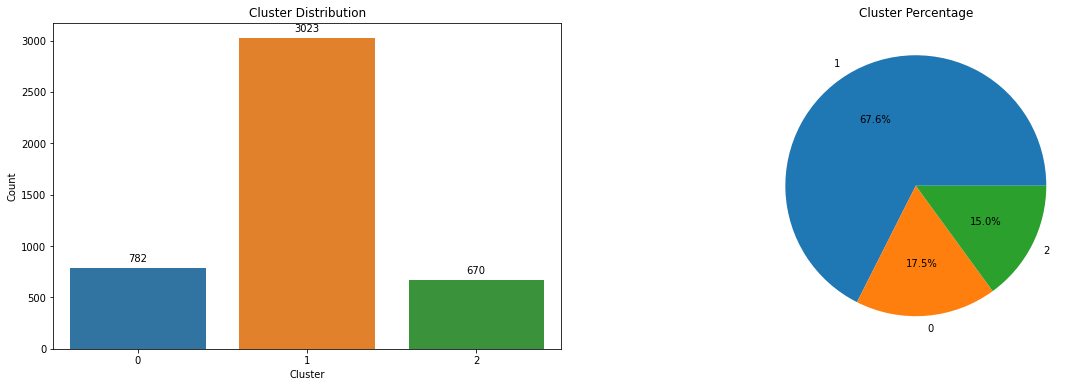

In [ ]:
# plot cluster
plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
fig = sns.countplot(x='CLUSTER', data=cluster_cc)
for p in fig.patches:
    fig.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.title('Cluster Distribution')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.subplot(1, 2, 2)
plt.pie(cluster_cc['CLUSTER'].value_counts(), labels=cluster_cc['CLUSTER'].value_counts().index, autopct='%1.1f%%')
plt.title('Cluster Percentage')
plt.show()

setelah diplot hasil clustering didapatkan
- cluster 0 berjumlah 17.5% atau 782 nasabah
- cluster 1 berjumlah 67.6% atau 3023 nasabah
- cluster 2 berjumlah 15.0% atau 670 nasabah

untuk mengetahui lebih detail mengenai apakah itu cluster 1/2/3 kita akan lanjutkan eda nya.

In [ ]:
# seleksi data pada cluster 0
cluster0 = cluster_cc[cluster_cc["CLUSTER"] == 0]

In [ ]:
# menampilkan describe cluster 0
cluster0.describe().T

,count,mean,std,min,25%,50%,75%,max
CUST_ID,782.0,4617.631714,2585.883638,5.000000,2378.500000,4837.000000,6833.500000,8935.00000
BALANCE,782.0,1517.885495,2077.318815,0.000000,96.871877,796.229896,1893.605507,16115.59640
BALANCE_FREQUENCY,782.0,0.868345,0.244980,0.000000,0.833333,1.000000,1.000000,1.00000
PURCHASES,782.0,925.985064,1885.997957,0.000000,55.125000,333.180000,997.697500,27957.68000
ONEOFF_PURCHASES,782.0,514.199731,1342.878075,0.000000,0.000000,9.855000,440.695000,23032.97000
INSTALLMENTS_PURCHASES,782.0,411.813465,925.912470,0.000000,0.000000,97.500000,468.260000,12738.47000
CASH_ADVANCE,782.0,961.563080,1849.565767,0.000000,0.000000,0.000000,1175.805985,16323.64243
PURCHASES_FREQUENCY,782.0,0.475634,0.392190,0.000000,0.083333,0.416667,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,782.0,0.177762,0.276810,0.000000,0.000000,0.083333,0.250000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,782.0,0.364121,0.391016,0.000000,0.000000,0.250000,0.750000,1.00000


In [ ]:
# seleksi data pada cluster 1
cluster1 = cluster_cc[cluster_cc["CLUSTER"] == 1]

In [ ]:
# menampilkan describe cluster 1
cluster1.describe().T

,count,mean,std,min,25%,50%,75%,max
CUST_ID,3023.0,4475.673503,2582.754023,1.00000,2224.000000,4441.000000,6755.000000,8949.00000
BALANCE,3023.0,1586.984284,2111.870419,0.00000,126.152932,879.190921,2064.570658,18495.55855
BALANCE_FREQUENCY,3023.0,0.879022,0.237199,0.00000,0.900000,1.000000,1.000000,1.00000
PURCHASES,3023.0,1023.879282,2150.823751,0.00000,41.630000,360.000000,1119.235000,41050.40000
ONEOFF_PURCHASES,3023.0,627.353420,1796.939044,0.00000,0.000000,49.890000,614.675000,40624.06000
INSTALLMENTS_PURCHASES,3023.0,396.643202,818.620238,0.00000,0.000000,86.220000,448.025000,12541.00000
CASH_ADVANCE,3023.0,957.691761,1915.637842,0.00000,0.000000,0.000000,1117.135892,27296.48576
PURCHASES_FREQUENCY,3023.0,0.498641,0.405525,0.00000,0.083333,0.500000,1.000000,1.00000
ONEOFF_PURCHASES_FREQUENCY,3023.0,0.210085,0.303433,0.00000,0.000000,0.083333,0.333333,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,3023.0,0.365759,0.400546,0.00000,0.000000,0.166667,0.750000,1.00000


In [ ]:
# seleksi data pada cluster 2
cluster2 = cluster_cc[cluster_cc["CLUSTER"] == 2]

In [ ]:
# menampilkan describe cluster 2
cluster2.describe().T

,count,mean,std,min,25%,50%,75%,max
CUST_ID,670.0,4305.486567,2580.656562,13.000000,2140.000000,4154.000000,6390.500000,8939.00000
BALANCE,670.0,1508.814378,1876.187699,0.000000,135.136432,903.960774,2110.464902,11631.32337
BALANCE_FREQUENCY,670.0,0.877533,0.234943,0.000000,0.888889,1.000000,1.000000,1.00000
PURCHASES,670.0,1000.361746,1822.725189,0.000000,20.610000,391.810000,1172.632500,15704.04000
ONEOFF_PURCHASES,670.0,552.480134,1255.912825,0.000000,0.000000,40.825000,552.495000,12618.86000
INSTALLMENTS_PURCHASES,670.0,448.847284,1076.121944,0.000000,0.000000,84.890000,513.425000,14686.10000
CASH_ADVANCE,670.0,1130.816056,2792.190498,0.000000,0.000000,0.000000,1123.136629,47137.21176
PURCHASES_FREQUENCY,670.0,0.471647,0.402855,0.000000,0.083333,0.416667,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,670.0,0.195824,0.297185,0.000000,0.000000,0.083333,0.250000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,670.0,0.355160,0.392327,0.000000,0.000000,0.166667,0.750000,1.00000


# Summary

- untuk rata2 balance pada cluster 0 1518 dollar, cluster 1 1587 dollar, cluster 2 1509 dollar
- rata2 pembelian, cluster 0 926 dollar, cluster 1 1024 dollar, cluster 2 1000 dollar
- rata limit credit, cluster 0 4478 dollar, cluster 1 4494 dollar, cluster 2 4519 dollar.
- dsb

**Summary of the cluster,**

pada describe lengkap tergambar jika cluster cluster yang didapatkan cukup mewakili data, dimana terdapat bagian 3 cluster
- 3023 nasabah berada di Cluster 1 yang mewakili nasabah dengan pengunaan credit card yang tinggi/High dan sering belanja
- 782 nasabah ada di Cluster 0 mewakili nasabah dengan pengunaan credit card yang rare jarang belanja
- dan 670 nasabah di cluster 2 mewakili nasabah dengan pengunaan credit card dengan type Medium.

pada pembaharuan selanjutnya, perbaiki data yang digunakan.
- drop kolom id yang memang dengan jelas tidak memiliki korelasi pada row lain
- hilangkan data outlier, karena model unsupervised cukup sensitif dengan outlier ex: dbscan
- handling outlier dapat berupa capping atau drop, usahakan untuk mempertahankan data
- handling juga skew data, bisa dengan log atau square**
- untuk outlier dapat dilakukan pengamatan lebih lanjut pada tahap lainnya, karena data is important dan meskipun outlier tetep memiliki arti tersendiri

# Conceptual Problems

Apakah yang dimaksud dengan inertia pada algoritma K-Means ?
- inertia pada Kmeans adalah nilai total jarak antara tiap titik dengan centroid terdekatnya

Jelaskan yang dimaksud dengan Elbow Method (alasan penggunaan, cara penggunaan, kelemahan/kelebihan, dll) !
- Elbow method adalah metoda yang digunakan untuk menentukan jumlah cluster pada k-means clustering
- sesuai namanya elbow/siku, dimana kita memilih titik siku optimumnya
- kelebihannya adalah dapat melihat nilai k yang terbaik pada grafik elbow methode tanpa mencoba satu persatu
- kelemahannya adalah jika elbow tidak membentuk siku yang lancip maka penentuan k nya menjadi subjective

Jelaskan perbedaan masing-masing algoritma clustering yang anda gunakan dalam kasus ini !
- Kmenas : algoritma K Means Clustering dimulai dengan menentukan titik awal. Biasanya, titik awal ini dipilih secara acak, Agar titik awal semakin presisi dan centroid tetap stabil, maka algoritma akan mulai melakukan perhitungan berulang. Proses tersebut akan berhenti secara otomatis jika centroid telah stabil.
- DBScan : sebuah data akan dikelompokkan dengan tetangganya, dikatakan bertetangga apabila jarak antara dua data tersebut kurang dari/sama dengan nilai epsilon. secara sederhana persebarannya seperti virus dan akan berhenti ketika tidak ada data didekatnya lagi, kemudian mulai pada data yang lain untuk cluster baru.
- Aglomerative : teknik clustering membentuk hirarki atau berdasarkan tingkatan tertentu sehingga menyerupai struktur pohon. Dengan demikian proses pengelompokannya dilakukan secara bertingkat atau bertahap seperti Dendogram.

